import library

In [46]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

Define the classes for the ImageNet dataset


In [47]:

with open('imagenet_classes.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

 Load the pre-trained model



In [48]:

model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Set the model to evaluate mode


In [49]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Define the image preprocessing steps

In [50]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

Load and preprocess the images

In [51]:
image_paths = []
for root, dirs, files in os.walk("images"):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

images = []
for path in image_paths:
    image = Image.open(path)
    image = preprocess(image)
    images.append(image)

Stack the images into a single tensor

In [52]:
batch = torch.stack(images, dim=0)

Pass the batch through the model

In [53]:
outputs = model(batch)

Get the predicted class indices

In [54]:
_, indices = torch.max(outputs, 1)

Get the predicted class labels

In [55]:
labels = [classes[i] for i in indices]

Visualize the images with their predicted labels



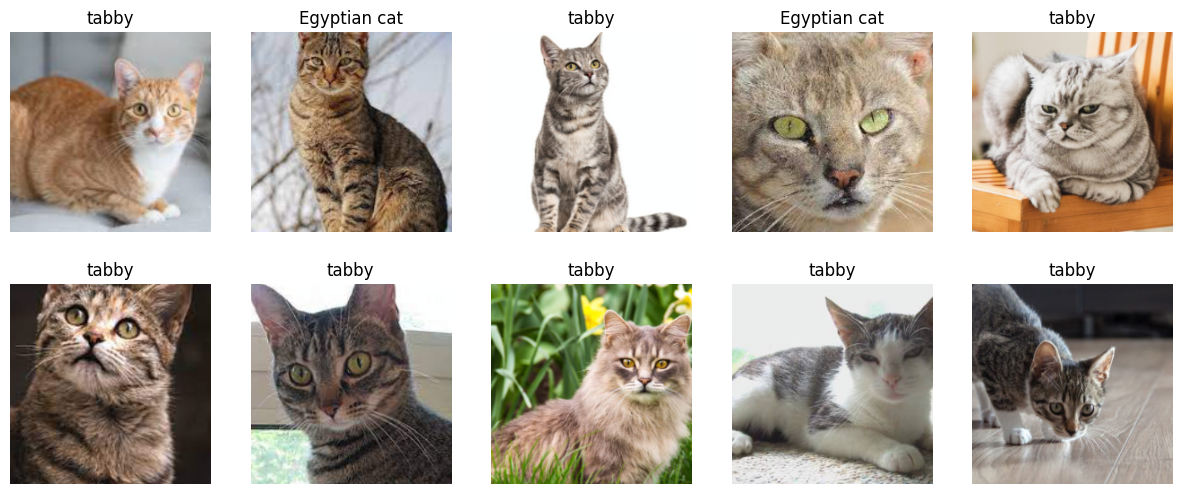

In [56]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, (image, label) in enumerate(zip(images, labels)):
    # Convert the tensor to a numpy array and transpose it
    np_image = np.transpose(image.numpy(), (1, 2, 0))
    # Denormalize the image
    np_image = np_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    # Clip the pixel values between 0 and 1
    np_image = np.clip(np_image, 0, 1)
    # Plot the image with its predicted label
    axs[i].imshow(np_image)
    axs[i].set_title(label)
    axs[i].axis('off')

plt.show()